# LAB4

In this laboratory we will focus on computing probability densities and ML estimates.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def vcol(vector, shape0):
    # Auxiliary function to transform 1-dim vectors to column vectors.
    return vector.reshape(shape0, 1)


def vrow(vector, shape1):
    # Auxiliary function to transform 1-dim vecotrs to row vectors.
    return vector.reshape(1, shape1)

def centerDataset(dataset):
    return dataset - dataset.mean(axis=1)


## Multivariate Gaussian density


In [4]:
def logpdf_GAU_ND(x, mu, sigma):
    return -(x.shape[0]/2)*np.log(2*np.pi)-(1/2)*(np.linalg.slogdet(sigma)[1])-(1/2)*((np.dot((x-mu).T, np.linalg.inv(sigma))).T*(x-mu)).sum(axis=0)
    

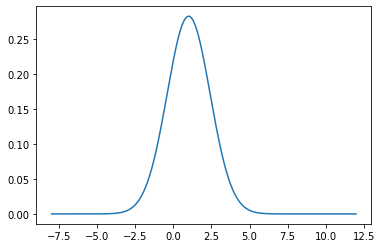

In [7]:
plt.figure()
XPlot = np.linspace(-8, 12, 1000)
m = np.ones((1,1)) * 1.0
C = np.ones((1,1)) * 2.0
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot,XPlot.size), m, C)))
plt.show()


In [9]:
pdfSol = np.load('solution/llGAU.npy')
pdfGau = logpdf_GAU_ND(vrow(XPlot, XPlot.size), m, C)
print(np.abs(pdfSol - pdfGau).max())

0.0


In [10]:
XND = np.load('solution/XND.npy')
mu = np.load('solution/muND.npy')
C = np.load('solution/CND.npy')
pdfSol = np.load('solution/llND.npy')
pdfGau = logpdf_GAU_ND(XND, mu, C)
print(np.abs(pdfSol - pdfGau).max())


0.0


In [12]:
def loglikelihood(dataset, mu, var):
    # Function that computes the log-likelihood for a dataset.
    # Returns the computed log-likelihood
    lll_samples = logpdf_GAU_ND(dataset, mu, var)
    return lll_samples.sum()  

In [18]:
C_ML =  np.dot(XND,XND.T) / float(XND.shape[1])
C_ML

array([[0.95106724, 0.08883769],
       [0.08883769, 0.82654486]])

In [27]:
m_ML = XND.mean(axis=1)
m_ML = vcol(m_ML, m_ML.size)
m_ML

array([[-0.07187197],
       [ 0.05979594]])

In [28]:
ll = loglikelihood(XND, m_ML, C_ML)
ll


-270.7077378683101